In [2]:
import numpy as np
from visualizacao import *
from Preprocessamento import *
from sklearn.metrics import accuracy_score
from Modelos import recria_diretorio
import sys


2025-03-26 15:03:10.996677: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743012191.011201 1931911 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743012191.015641 1931911 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-26 15:03:11.031071: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
import os

df = pd.read_csv('/home/lucas/PIBIC (copy)/CSV/PUC/PUC_Segmentado_Teste.csv')
invalid_paths = [path for path in df["caminho_imagem"] if not os.path.exists(path)]
print(invalid_paths)  # Mostra quais arquivos estão com problemas


[]


In [4]:
from modelos import *

modelo = Gerador()
modelo.carrega_modelo("Modelos/Modelo_Kyoto-8/Modelo-Base/Estrutura/Modelo_Kyoto-8.keras")

ModuleNotFoundError: No module named 'modelos'

In [ ]:

path = '/media/hd/mnt/data/Lucas$'

def verifica_dir(nome_modelo, nome_base):
    if not os.path.isdir(os.path.join(path, f'Modelos/Fusoes-{nome_modelo}')):
        os.mkdir(os.path.join(path,f'Modelos/Fusoes-{nome_modelo}'))
    if not os.path.isdir(os.path.join(path,f'Modelos/Fusoes-{nome_modelo}/Treinados_em_{nome_base}')):
        os.mkdir(os.path.join(path,f'Modelos/Fusoes-{nome_modelo}/Treinados_em_{nome_base}'))
    if not os.path.isdir(os.path.join(path,f'Modelos/Fusoes-{nome_modelo}/Treinados_em_{nome_base}/Matriz_confusao')):
        os.mkdir(os.path.join(path,f'Modelos/Fusoes-{nome_modelo}/Treinados_em_{nome_base}/Matriz_confusao'))
    if not os.path.isdir(os.path.join(path,f'Modelos/Fusoes-{nome_modelo}/Treinados_em_{nome_base}/Grafico_batchs')):
        os.mkdir(os.path.join(path, f'Modelos/Fusoes-{nome_modelo}/Treinados_em_{nome_base}/Grafico_batchs'))
    if not os.path.isdir(os.path.join(path,f'Modelos/Fusoes-{nome_modelo}/Treinados_em_{nome_base}/Grafico_batchs')):
        os.mkdir(os.path.join(path, f'Modelos/Fusoes-{nome_modelo}/Treinados_em_{nome_base}/Grafico_batchs'))

def mapear(classes):
    return np.array([1 if classe == 1 else 0 for classe in classes])


bases_teste = ['PUC']


In [ ]:
def soma_previsoes(nome_modelo, batch_size, n_modelos, base_de_treino, base_de_teste):
    """
    Retorna um array com todos os resultados de todas as classes conforme o batch passado
    """
    

    if base_de_teste == base_de_treino:
        dir_base = f'Modelos/{nome_modelo}-0/Classificador/Resultados/Treinados_em_{base_de_treino}/{base_de_teste}/batches-{batch_size}.npy' 
    else:
        dir_base = f'Modelos/{nome_modelo}-0/Classificador/Resultados/Treinados_em_{base_de_treino}/{base_de_teste}/batchs-{batch_size}.npy' 

    base = np.load(os.path.join(path, 
        dir_base)
    )

    resultado = np.zeros_like(base)
    for i in range(n_modelos):
        if base_de_teste == base_de_treino:
            npy = f'Modelos/{nome_modelo}-{i}/Classificador/Resultados/Treinados_em_{base_de_treino}/{base_de_teste}/batches-{batch_size}.npy' 
        else:
            npy = f'Modelos/{nome_modelo}-{i}/Classificador/Resultados/Treinados_em_{base_de_treino}/{base_de_teste}/batchs-{batch_size}.npy' 
        caminho = os.path.join(path,npy)
        array = np.load(caminho)
        resultado = resultado + array
        print(resultado)
    resultado = np.argmax(resultado, axis=1)
    return resultado 

def soma(nome_modelo, bases_de_treino, n_modelos):
    batches = [64,128,256,512,1024]
    for base_treino in bases_de_treino:
        for base_teste in bases_teste:
            verifica_dir(nome_modelo, base_treino)
            resultados = []
            for batch_size in batches:  
                resultado = soma_previsoes(nome_modelo, batch_size, n_modelos, base_treino, base_teste)
                df = pd.read_csv(f'CSV/{base_teste}/{base_teste}_Segmentado_Teste.csv')
                df = mapear(df['classe'])
                #plot_confusion_matrix(df, resultado, title=f'Fusão {nome_modelo} - Batch: {batch_size}',
                 #save_path=os.path.join(path, f'Modelos/Fusoes-{nome_modelo}/Treinados_em_{base_treino}/Matriz_confusao'))
                acc = accuracy_score(df, resultado)
                resultados.append(acc)

        grafico_batchs(batches, resultados, nome_modelo=f'Soma-{nome_modelo}-{base_treino}',
            caminho_para_salvar=os.path.join(path, f'Modelos/Fusoes-{nome_modelo}/Treinados_em_{base_treino}/Grafico_batchs'), 
            nome_base_treino=base_treino, base_usada_teste=base_teste)

[[0.61011946 0.3898805 ]
 [0.45591187 0.5440881 ]
 [0.43020293 0.56979704]
 ...
 [0.45990893 0.54009104]
 [0.5839583  0.41604167]
 [0.460203   0.53979695]]
[[1.1510704  0.8489295 ]
 [0.9625913  1.0374087 ]
 [0.91748655 1.0825135 ]
 ...
 [0.94565034 1.0543497 ]
 [1.1033853  0.8966147 ]
 [0.9657189  1.034281  ]]
[[1.702977  1.2970229]
 [1.463382  1.536618 ]
 [1.3700978 1.6299022]
 ...
 [1.4473995 1.5526005]
 [1.6739007 1.3260993]
 [1.4759753 1.5240247]]
[[2.2389507 1.7610492]
 [1.9532009 2.0467992]
 [1.8673334 2.1326666]
 ...
 [1.9386878 2.0613122]
 [2.1952815 1.8047185]
 [1.9828584 2.0171416]]
[[2.83623   2.16377  ]
 [2.4489417 2.5510585]
 [2.3711057 2.6288946]
 ...
 [2.4261303 2.5738697]
 [2.7202902 2.2797098]
 [2.513936  2.486064 ]]
[[3.3880572 2.6119428]
 [2.9371693 3.062831 ]
 [2.87372   3.1262803]
 ...
 [2.9090803 3.0909197]
 [3.2488303 2.7511697]
 [3.0363097 2.9636905]]
[[3.897968  3.102032 ]
 [3.430984  3.5690162]
 [3.32338   3.67662  ]
 ...
 [3.397833  3.602167 ]
 [3.782703  3.2

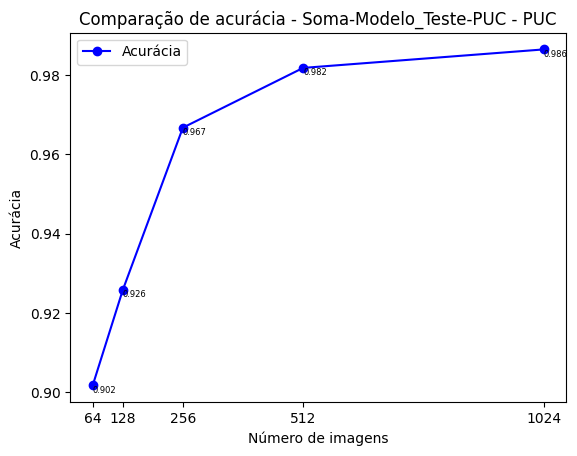

In [ ]:
soma("Modelo_Teste", ['PUC'], 9)